## Supervised Learning with ScikitLearn
### Datacamp
## Regression

In regression tasks, the target variable typically has continuous values, such as a country's GDP, or the price of a house.

## Predicting blood glucose levels

We have a dataset containing women's health data to predict blood glucose levels. We load the dataset as a pandas DataFrame, and print the first five rows. It contains features including number of pregnancies, triceps skinfold measurements, insulin levels, body mass index, known as BMI, age in years, and diabetes status, with one indicating a diagnosis, and zero representing the absence of a diagnosis.

In [1]:
import pandas as pd

In [2]:
diabetes_df = pd.read_csv('diabetes_clean.csv')

In [4]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Creating feature and target arrays
Scikit-learn requires features and target values in distinct variables, X and y. To use all of the features in our dataset, we drop our target, blood glucose levels, and store the values attribute as X. For y, we take the the target column's values attribute. We can print the type for X and y to confirm they are now both NumPy arrays.

In [41]:
X = diabetes_df.drop("glucose", axis = 1).values
y = diabetes_df["glucose"].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [38]:
diabetes_df.drop("glucose", axis = 1)

,pregnancies,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,72,35,0,33.6,0.627,50,1
1,1,66,29,0,26.6,0.351,31,0
2,8,64,0,0,23.3,0.672,32,1
3,1,66,23,94,28.1,0.167,21,0
4,0,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,76,48,180,32.9,0.171,63,0
764,2,70,27,0,36.8,0.340,27,0
765,5,72,23,112,26.2,0.245,30,0
766,1,60,0,0,30.1,0.349,47,1


## Making predictions from a single feature
To start, let's try to predict blood glucose levels from a single feature: body mass index. To do this, we slice out the BMI column of X, which is the fifth column, storing as the variable X_bmi.  

In [44]:
X_bmi = X[:,4]
print(y.shape, X_bmi.shape)

(768,) (768,)


In [45]:
X_bmi[0]

33.6

Checking the shape of y and X_bmi, we see that they are both one-dimensional arrays. This is fine for y, but our features must be formatted as a two-dimensional array to be accepted by scikit-learn.To convert the shape of X_bmi we apply NumPy's dot-reshape method, passing minus one followed by one. Printing the shape again shows X_bmi is now the correct shape for our model.

In [29]:
X_bmi = X_bmi.reshape(-1,1)
print(X_bmi.shape)

(768, 1)


## Plotting glucose vs. body mass index
Now, let's plot blood glucose levels as a function of body mass index. 

In [10]:
import matplotlib.pyplot as plt

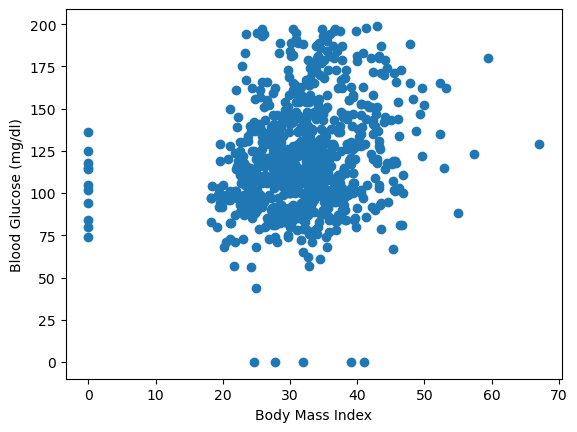

In [30]:
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

We can see that, generally, as body mass index increases, blood glucose levels also tend to increase.



## Fitting a regression model
It's time to fit a regression model to our data. We're going to use a model called linear regression, which fits a straight line to our data.

We import LinearRegression from sklearn-dot-linear_model, and instantiate our regression model. 

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
reg = LinearRegression()

As we are modeling the relationship between the feature, body mass index, and the target, blood glucose levels, rather than predicting target values for new observations, we fit the model to all of our feature observations. We do this by calling reg-dot-fit and passing in the feature data and the target variable. 

In [34]:
reg.fit(X_bmi , y)

LinearRegression()

After this, we can create the predictions variable by calling reg-dot-predict and passing in our features.

In [35]:
predictions = reg.predict(X_bmi)

 As we are predicting the target values of the features used to train the model, this gives us a line of best fit for our data. We produce our scatter plot again, and then call plt-dot-plot to produce a line plot, passing our features, X_bmi, followed by our predictions.



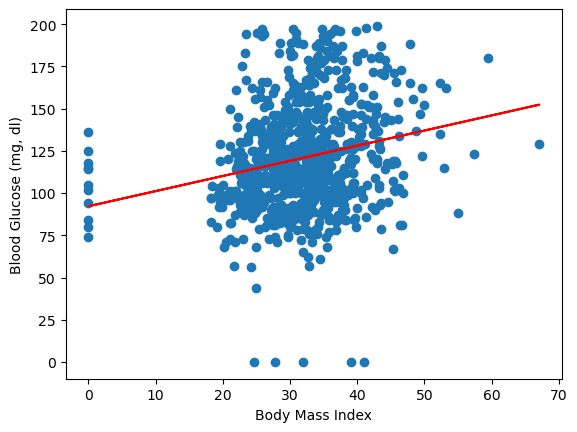

In [36]:
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, "r")
plt.ylabel("Blood Glucose (mg, dl)")
plt.xlabel("Body Mass Index")
plt.show()

The red line represents the linear regression model's fit of blood glucose values against body mass index, which appears to have a weak-to-moderate positive correlation.



## Predicting Sales

We will work with a dataset called sales_df, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign.

In [23]:
sales_df = pd.read_csv("advertising_and_sales_clean.csv")

In [27]:
sales_df

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18
...,...,...,...,...,...
4541,26000.0,4472.36,717.09,Micro,94685.87
4542,71000.0,20610.69,6545.57,Nano,249101.92
4543,44000.0,19800.07,5096.19,Micro,163631.46
4544,71000.0,17534.64,1940.87,Macro,253610.41


### Creating features
We will use the advertising expenditure as features to predict sales values, initially working with the "radio" column. However, before we make any predictions we will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.

- Create X, an array of the values from the sales_df DataFrame's "radio" column.
- Create y, an array of the values from the sales_df DataFrame's "sales" column.
- Reshape X into a two-dimensional NumPy array.
- Print the shape of X and y.

In [26]:
import numpy as np

In [52]:
# Create X from the radio column's values
X = sales_df.values[:,1]
X

array([6566.23, 9237.76, 15886.45, ..., 19800.07, 17534.64, 15966.69],
      dtype=object)

In [53]:
# Create y from the sales column's values
y = sales_df["sales"].values
y

array([ 54732.76,  46677.9 , 150177.83, ..., 163631.46, 253610.41,
       148202.41])

In [54]:
# Reshape X
X = X.reshape(-1,1)

In [55]:
# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


Now let's build a linear regression model!

## Building a linear regression model
Now we have created our feature and target arrays, we will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

In [56]:
y = sales_df["sales"].values
X = sales_df["radio"].values.reshape(-1, 1)

- Import LinearRegression.
- Instantiate a linear regression model.
- Predict sales values using X, storing as predictions.

In [57]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


The values for the first five predictions range from $95,000 to over $290,000. Let's visualize the model's fit.

## Visualizing a linear regression model
Now we have built our linear regression model and trained it using all available observations, we can visualize how well the model fits the data. This allows us to interpret the relationship between radio advertising expenditure and sales values.

- Import matplotlib.pyplot as plt.
- Create a scatter plot visualizing y against X, with observations in blue.
- Draw a red line plot displaying the predictions against X.
- Display the plot.

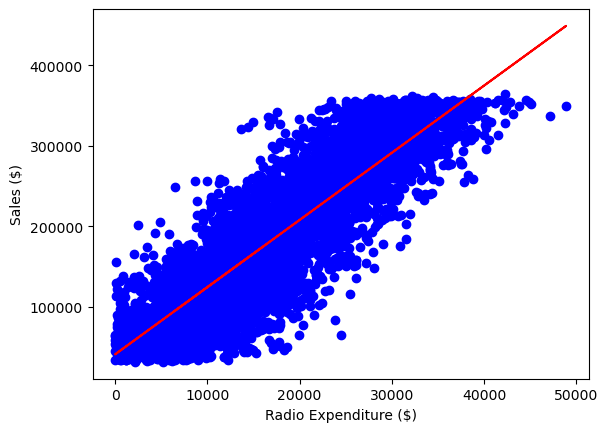

In [59]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="b")

# Create line plot
plt.plot(X, predictions, color="r")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

The model nicely captures a near-perfect linear correlation between radio advertising expenditure and sales! Now let's take a look at what is going on under the hood to calculate this relationship.

## Regression mechanics
We want to fit a line to the data, and in two dimensions this takes the form

     y = ax + b

- Simple linear regression uses one feature 
    - y = target
    - x = single feature 
    - a, b = parameters/coecients of the model-slope, intercept 


 Using a single feature is known as simple linear regression, where y is the target, x is the feature, and a and b are the model parameters that we want to learn. a and b are also called the model coefficients, or the slope and intercept, respectively

-  How do we accurately choose values for a and b?
    -  We can define an error function for any given line 
    - then choose the line that minimizes this function. 
- Error function =  loss function = cost function 


## The loss function
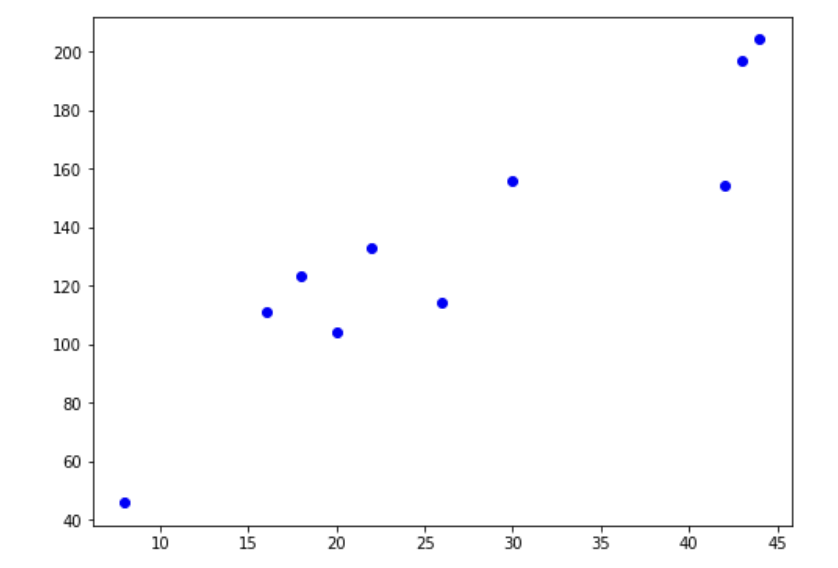

Let's visualize a loss function using this scatter plot. We want the line to be as close to the observations as possible. Therefore, we want to minimize the vertical distance between the fit and the data. So for each observation, we calculate the vertical distance between it and the line.

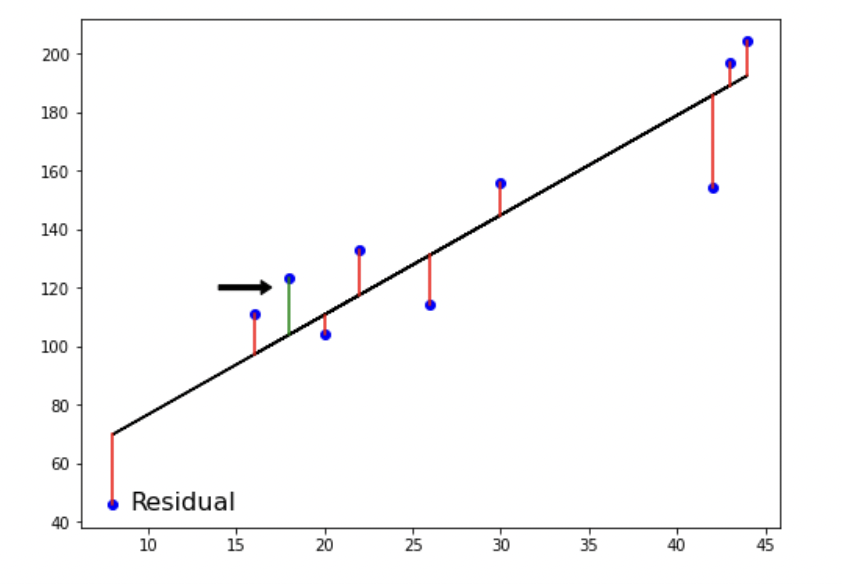

This distance is called a residual. We could try to minimize the sum of the residuals,but then each positive residual would cancel out each negative residual.







## Ordinary Least Squares

 To avoid this, we square the residuals. By adding all the squared residuals, we calculate the residual sum of squares, or RSS. This type of linear regression is called Ordinary Least Squares, or OLS, where we aim to minimize the RSS.
 
 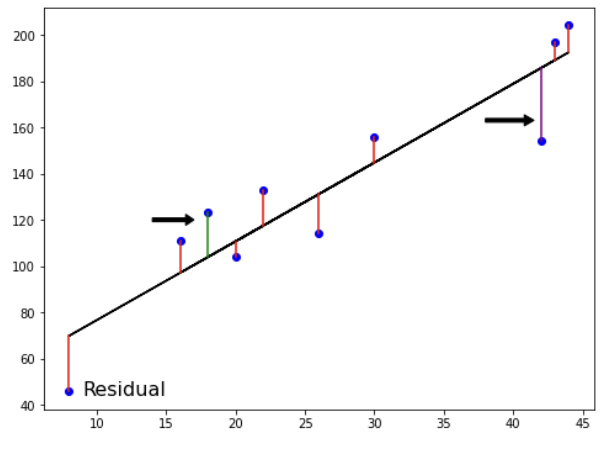
 
 
 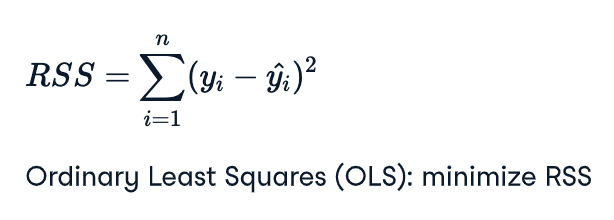

## Linear regression in higher dimensions

When we have two features, x1 and x2, and one target, y, a line takes the form 

y = a_1x_{1} + a_2x_2 + b
    
So to fit a linear regression model we specify three variables, a1, a2, and the intercept, b. 

When adding more features, it is known as multiple linear regression. Fitting a multiple linear regression model means specifying a coefficient, a n, for n number of features, and b. For multiple linear regression models, scikit-learn expects one variable each for feature and target values.


## Linear regression to predict blood glucose levels using all features
Let's perform linear regression to predict blood glucose levels using all of the features from the diabetes dataset.We split the data into training and test sets, instantiate the model, fit it on the training set, and predict on the test set. 

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [61]:
X = diabetes_df.drop("glucose", axis = 1).values
y = diabetes_df["glucose"].values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

Linear regression in scikit-learn performs OLS under the hood.

## R-squared

The default metric for linear regression is R-squared, which quantifies the amount of variance in the target variable that is explained by the features. Values can range from zero to one, with one meaning the features completely explain the target's variance. Here are two plots visualizing high and low R-squared respectively.

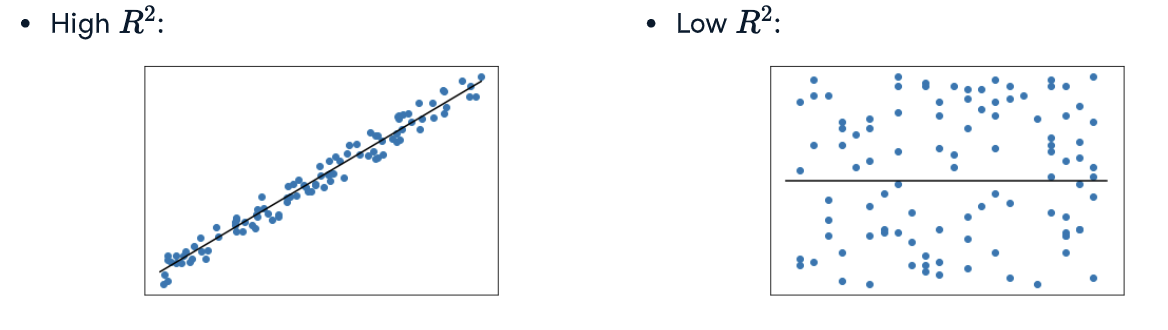

To compute R-squared, we call the model's dot-score method, passing the test features and targets.

In [67]:
reg_all.score(X_test, y_test)

0.2828046881037515

 Here the features only explain about 28 percent of blood glucose level variance.

## Mean squared error and root mean squared error
Another way to assess a regression model's performance is to take the mean of the residual sum of squares. This is known as the mean squared error, or MSE. 

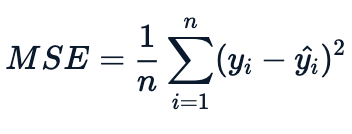

MSE is measured in units of our target variable, squared. For example, if a model is predicting a dollar value, MSE will be in dollars squared. To convert to dollars, we can take the square root, known as the root mean squared error, or RMSE.

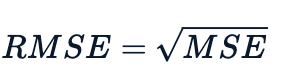

To calculate RMSE, we import mean_squared_error from sklearn-dot-metrics, then call mean_squared_error. We pass y_test and y_pred, and set squared equal to False, which returns the square root of the MSE. 

In [68]:
from sklearn.metrics import mean_squared_error

In [69]:
mean_squared_error(y_test, y_pred, squared = False)

26.34145958223226

The model has an average error for blood glucose levels of around 26 milligrams per deciliter.

## Fit and predict for regression for sales dataset


Now, our task is to create a multiple linear regression model using all of the features in the sales_df dataset. We will then use this model to predict sales based on the values of the test features.

- Create X, an array containing values of all features in sales_df, and y, containing all values from the "sales" column.
- Instantiate a linear regression model.
- Fit the model to the training data.
- Create y_pred, making predictions for sales using the test features.

In [70]:
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [76]:
sales_df = sales_df.drop("influencer", axis=1)

In [90]:
# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


The first two predictions appear to be within around 5% of the actual values from the test set!

## Regression performance
Now we have fit a model, reg, using all features from sales_df, and made predictions of sales values, we can evaluate performance using some common regression metrics.

Our task is to find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data.

- Import mean_squared_error.
- Calculate the model's R-squared score by passing the test feature values and the test target values to an appropriate method.
- Calculate the model's root mean squared error using y_test and y_pred.
- Print r_squared and rmse.

In [80]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996000988


The features explain 99.9% of the variance in sales values! Looks like this company's advertising strategy is working well!

The model has an average error for sales of around 2944. 

## Cross-validation


If we're computing R-squared on our test set, the R-squared returned is dependent on the way that we split up the data! The data points in the test set may have some peculiarities that mean the R-squared computed on it is not representative of the model's ability to generalize to unseen data. To combat this dependence on what is essentially a random split, we use a technique called cross-validation.

- We begin by splitting the dataset into five groups or folds.
- Then we set aside the first fold as a test set,
- fit our model on the remaining four folds, predict on our test set,
- and compute the metric of interest, such as R-squared.
- Next, we set aside the second fold as our test set,
- fit on the remaining data, predict on the test set,
- and compute the metric of interest.
- Then similarly with the third fold, the fourth fold, and the fifth fold.

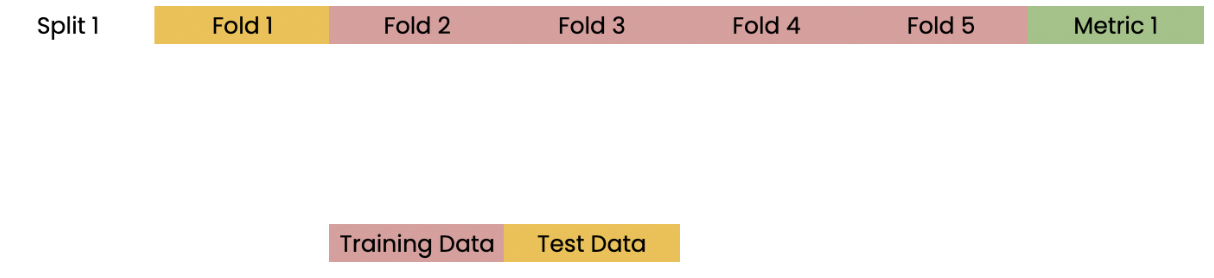

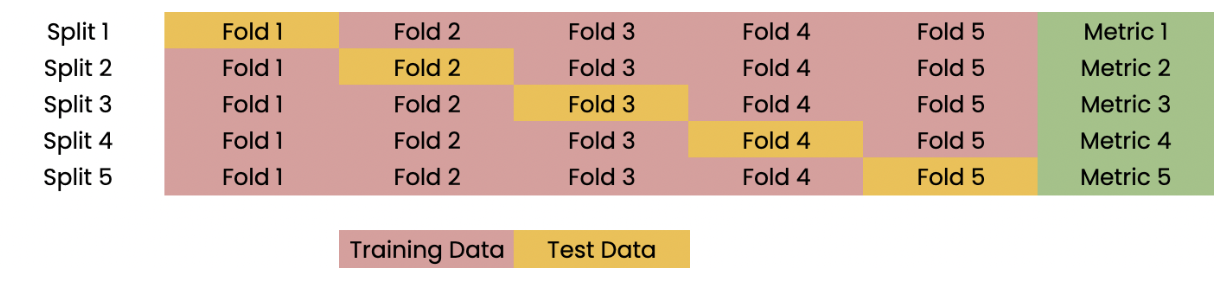

As a result we get five values of R-squared from which we can compute statistics of interest, such as the mean, median, and 95% confidence intervals.

## Cross-validation and model performance

- 5 folds = 5-fold CV
- 10 folds = 10-fold CV
- k folds = k-fold CV
- more folds = More computationally expensive

Using more folds is more computationally expensive. This is because we are fitting and predicting more times.

- To perform k-fold cross-validation in scikit-learn, we import cross_val_score from sklearn-dot-model_selection. 
- We also import KFold, which allows us to set a seed and shuffle our data, making our results repeatable downstream. 
- We first call KFold. The n_splits argument has a default of five, but in this case we assign six, allowing us to use six folds from our dataset for cross-validation.
- We also set shuffle to True, which shuffles our dataset before splitting into folds. 
- We also assign a seed to the random_state keyword argument, ensuring our data would be split in the same way if we repeat the process making the results repeatable downstream. 

In [81]:
from sklearn.model_selection import cross_val_score, KFold

As usual, we instantiate our model, in this case, linear regression. We then call cross_val_score, passing the model, the feature data, and the target data as the first three positional arguments. We also specify the number of folds by setting the keyword argument cv equal to our kf variable. 

In [91]:
X = diabetes_df.drop("glucose", axis = 1).values
y = diabetes_df["glucose"].values

In [92]:
kf = KFold(n_splits = 6 , shuffle = True, random_state = 42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv = kf)

This returns an array of cross-validation scores, which we assign to cv_results. The length of the array is the number of folds utilized. Note that the score reported is R squared, as this is the default score for linear regression.

## Evaluating cross-validation peformance



In [93]:
cv_results

array([0.26207548, 0.28228176, 0.41203082, 0.23785884, 0.41634629,
       0.30398869])

 This returns six results ranging from zero-point-seven to approximately zero-point-seven-seven.

 We can calculate the mean score using np-dot-mean, and the standard deviation using np-dot-std. 

In [94]:
print(np.mean(cv_results), np.std(cv_results))

0.3190969786734479 0.07015320610114217


Additionally, we can calculate the 95% confidence interval using the np-dot-quantile function, passing our results followed by a list containing the upper and lower limits of our interval as decimals.

In [95]:
print(np.quantile(cv_results,[0.025, 0.975] ))

[0.24088592 0.41580685]


## Cross-validation for R-squared for Sales dataset
Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

We will build a linear regression model, then use 6-fold cross-validation to assess its accuracy for predicting sales using social media advertising expenditure. We will display the individual score for each of the six-folds.

- Import KFold and cross_val_score.
- Create kf by calling KFold(), setting the number of splits to six, shuffle to True, and setting a seed of 5.
- Perform cross-validation using reg on X and y, passing kf to cv.
- Print the cv_scores.

In [102]:
# Create X and y arrays
X = sales_df.drop(["sales", "tv"], axis=1).values
y = sales_df["sales"].values

In [103]:
X

array([[ 6566.23,  2907.98],
       [ 9237.76,  2409.57],
       [15886.45,  2913.41],
       ...,
       [19800.07,  5096.19],
       [17534.64,  1940.87],
       [15966.69,  5046.55]])

In [105]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.74451678 0.77241887 0.76842114 0.7410406  0.75170022 0.74406484]


R-squared for each fold ranged between 0.74 and 0.77? By using cross-validation, we can see how performance varies depending on how the data is split!

## Analyzing cross-validation metrics
Now we have performed cross-validation, it's time to analyze the results.

We will display the mean, standard deviation, and 95% confidence interval for cv_results.

- Calculate and print the mean of the results.
- Calculate and print the standard deviation of cv_results.
- Display the 95% confidence interval for your results using np.quantile().

In [106]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.7536937414361207
0.01230538907047471
[0.74141863 0.77191916]


An average score of 0.75 with a low standard deviation is pretty good for a model out of the box!

## Regularized regression
Regularization in regression is a technique used to avoid overfitting.

Fitting a linear regression model minimizes a loss function to choose a coefficient, a, for each feature, and the intercept, b. If we allow these coefficients to be very large, we can get overfitting. Therefore, it is common practice to alter the loss function so that it penalizes large coefficients. This is called regularization.

### 1. Ridge regression

With ridge, we use the Ordinary Least Squares loss function plus the squared value of each coefficient, multiplied by a constant, alpha.

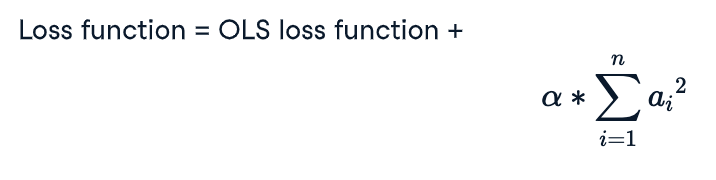

- Ridge penalizes large positive or negative coefficients
- α:parameter we need to choose
- Picking α is similar to picking k in KNN 
- Hyperparameter: variable used to optimize model parameters 
- α controls model complexity 
    - α = 0 = OLS(Can lead to overfitting)
    - Very high α: Can lead to underfitting


So, when minimizing the loss function, models are penalized for coefficients with large positive or negative values. When using ridge, we need to choose the alpha value in order to fit and predict. Essentially, we can select the alpha for which our model performs best. Picking alpha for ridge is similar to picking k in KNN. Alpha in ridge is known as a hyperparameter, which is a variable used for selecting a model's parameters. Alpha controls model complexity. When alpha equals zero, we are performing OLS, where large coefficients are not penalized and overfitting may occur. A high alpha means that large coefficients are significantly penalized, which can lead to underfitting.

In [108]:
X = diabetes_df.drop("glucose", axis = 1).values
y = diabetes_df["glucose"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [107]:
from sklearn.linear_model import Ridge

In [109]:
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))


[0.28284666232222233, 0.28320633574804766, 0.2853000732200004, 0.2642398481266812, 0.1929242469410093]


- To highlight the impact of different alpha values, we create an empty list for our scores, 
- then loop through a list of different alpha values. 
- Inside the for loop we instantiate Ridge, setting the alpha keyword argument equal to the iterator, also called alpha. 
- We fit on the training data, and 
- predict on the test data. 
- We save the model's R-squared value to the scores list. 


Finally, outside of the loop, we print the scores for the models with five different alpha values. 

In [110]:
print(scores)

[0.28284666232222233, 0.28320633574804766, 0.2853000732200004, 0.2642398481266812, 0.1929242469410093]


We see performance gets worse as alpha increases.

#### Regularized regression: Ridge for sales dataset
Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

We will fit ridge regression models over a range of different alpha values, and print their 
 scores. We will use all of the features in the sales_df dataset to predict "sales". 

In [122]:
# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- Import Ridge.
- Instantiate Ridge, setting alpha equal to alpha.
- Fit the model to the training data.
- Calculate the R-squared score for each iteration of ridge.

In [123]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
    # Create a Ridge regression model
    ridge = Ridge(alpha = alpha)
  
    # Fit the data
    ridge.fit(X_train, y_train)
  
    # Obtain R-squared
    score = ridge.score(X_test, y_test)
    ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


The scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target—even by heavily penalizing large coefficients, underfitting does not occur!

### 2. Lasso regression

There is another type of regularized regression called lasso, where our loss function is the OLS loss function plus the absolute value of each coefficient multiplied by some constant, alpha.

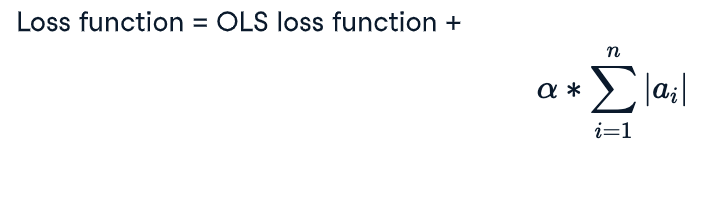

In [111]:
from sklearn.linear_model import Lasso

In [116]:
scores= []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0, 100.0]:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

[0.2831114455475573, 0.29795609755827845, 0.17989838789273893, 0.18127361610181125, 0.15679544303617965, 0.10438614467572016]


Performance drops substantially as alpha goes over 20!

##  Lasso regression for feature selection
Lasso regression can actually be used to assess feature importance. This is because it tends to shrink the coefficients of less important features to zero. The features whose coefficients are not shrunk to zero are selected by the lasso algorithm.

In [117]:
from sklearn.linear_model import Lasso

In [119]:
X = diabetes_df.drop("glucose", axis = 1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose", axis = 1).columns
lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X,y).coef_


- We create our feature and target arrays, and 
- use the dataset's dot-columns attribute to access the feature names and store as the variable names. As we are calculating feature importance we use the entire dataset, rather than splitting it. 
- We then instantiate Lasso, setting alpha to zero-point-one. 
- We fit the model to the data and extract the coefficients using the dot-coef-underscore attribute, storing as lasso_coef. 

We then plot the coefficients for each feature.

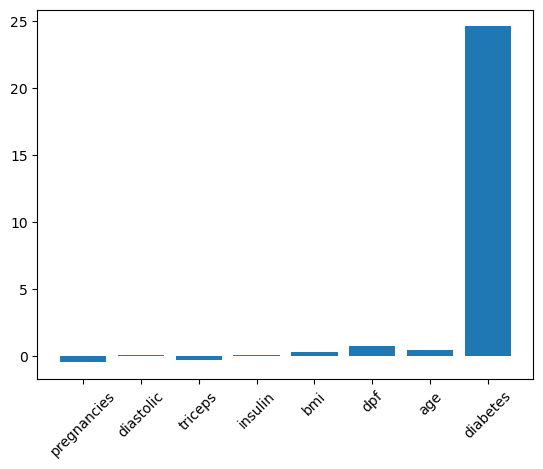

In [121]:
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

We can see that the most important predictor for our target variable, blood glucose levels, is the binary value for whether an individual has diabetes or not! This is not surprising, but is a great sanity check. This type of feature selection is very important because it allows us to communicate results to non-technical audiences. It is also useful for identifying which factors are important predictors for various physical phenomena.



#### Lasso regression for feature importance of sales dataset
We will fit a lasso regression model to the sales_df data and plot the model's coefficients.

- Import Lasso from sklearn.linear_model.
- Instantiate a Lasso regressor with an alpha of 0.3.
- Fit the model to the data.
- Compute the model's coefficients, storing as lasso_coef.

In [125]:
# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values
sales_columns = sales_df.drop("sales", axis=1).columns

[ 3.56256962 -0.00397035  0.00496385]


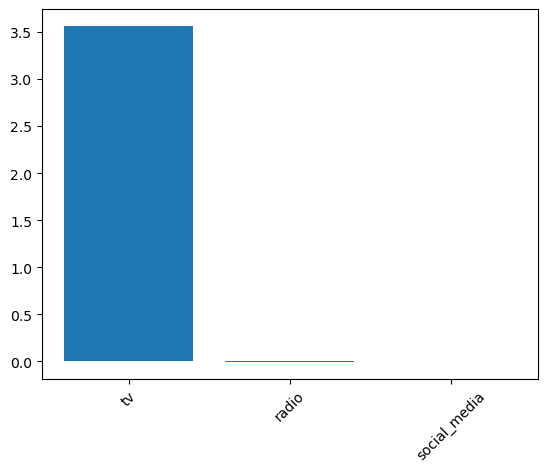

In [127]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha = 0.3)

# Fit the model to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

The figure makes it clear that expenditure on TV advertising is the most important feature in the dataset to predict sales values!